In [1]:
# Pythonによる機械学習の視覚化ツールとしてJupyter Notebookを使用
# 使用方法は少し面倒臭いので、使いたければ直接質問ください。
# Jupyter Notebookは'セル'と呼ばれる単位で構成される
# セルごとにPythonのコードを実行することが出来る

# 例 )
print('Hello')

a = 1
b = 3

print(a + b)

Hello
4


In [2]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# matplotlibのインライン化
% matplotlib inline

In [4]:
# irisデータセットの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
6                  4.6               3.4                1.4               0.3
7                  5.0               3.4                1.5               0.2
8                  4.4               2.9                1.4               0.2
9                  4.9               3.1                1.5               0.1
10                 5.4               3.7                1.5               0.2
11                 4.8            

In [5]:
# irisクラスの読み込み
df_ans = iris.target
df_ans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# irisクラスの番号−種類関係
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [7]:
# irisクラスをデータセットに変換
df_ans = pd.DataFrame(df_ans)
df_ans.head()

,0
0,0
1,0
2,0
3,0
4,0


In [8]:
# データフレームの整形
df['class'] = df_ans
df['name'] = iris.target_names[df['class']]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# 欠損値を一つでも含む行を抽出する (水平方向に any を実行することで行を抽出する)
df_missing = df[df.isnull().any(axis=1)]
df_missing

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,name


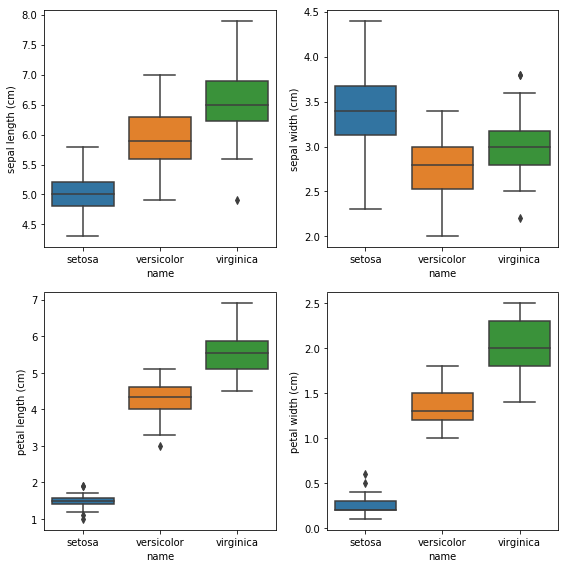

In [10]:
# 各クラスの特徴量の傾向
plt.figure(figsize=(8,8))

i = 0
for col in df.columns[0:4]:
    i = i + 1
    plt.subplot(2, 2, i)
    sns.boxplot(x='name' , y=col , data=df)
    
plt.tight_layout()

# 全ての特徴量に明確な関係性が見られる

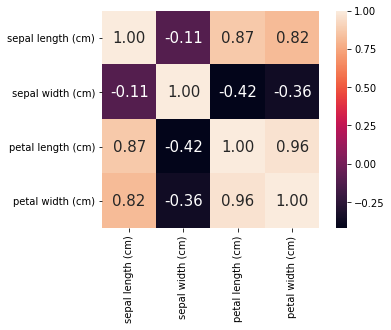

In [11]:
# 相関行列の作成
cr = ['sepal length (cm)' , 'sepal width (cm)' ,  'petal length (cm)' ,  'petal width (cm)']
cr_matrix = df[cr].corr()
heatmap = sns.heatmap(cr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cr,xticklabels=cr)

In [16]:
# データのランダム抽出
df = df.take(np.random.permutation(len(df)))
df = df.reset_index(drop=True)
df_test = df[0:50]
df_train = df[50:150]

df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,name
50,4.8,3.0,1.4,0.1,0,setosa
51,5.9,3.0,5.1,1.8,2,virginica
52,4.6,3.1,1.5,0.2,0,setosa
53,6.2,3.4,5.4,2.3,2,virginica
54,5.6,2.8,4.9,2.0,2,virginica


In [20]:
# DFをarrayに変換
se_test = np.array(df_test)
se_test

array([[5.0, 3.5, 1.6, 0.6, 0, 'setosa'],
       [5.5, 2.5, 4.0, 1.3, 1, 'versicolor'],
       [7.1, 3.0, 5.9, 2.1, 2, 'virginica'],
       [6.4, 3.1, 5.5, 1.8, 2, 'virginica'],
       [7.7, 2.6, 6.9, 2.3, 2, 'virginica'],
       [5.8, 2.7, 3.9, 1.2, 1, 'versicolor'],
       [4.5, 2.3, 1.3, 0.3, 0, 'setosa'],
       [5.5, 2.4, 3.8, 1.1, 1, 'versicolor'],
       [5.2, 2.7, 3.9, 1.4, 1, 'versicolor'],
       [5.6, 2.5, 3.9, 1.1, 1, 'versicolor'],
       [6.3, 2.3, 4.4, 1.3, 1, 'versicolor'],
       [5.1, 3.8, 1.5, 0.3, 0, 'setosa'],
       [5.7, 2.6, 3.5, 1.0, 1, 'versicolor'],
       [6.7, 3.1, 4.7, 1.5, 1, 'versicolor'],
       [5.5, 2.3, 4.0, 1.3, 1, 'versicolor'],
       [6.7, 3.0, 5.0, 1.7, 1, 'versicolor'],
       [6.9, 3.1, 5.4, 2.1, 2, 'virginica'],
       [6.8, 3.0, 5.5, 2.1, 2, 'virginica'],
       [6.4, 2.8, 5.6, 2.1, 2, 'virginica'],
       [6.4, 3.2, 4.5, 1.5, 1, 'versicolor'],
       [7.3, 2.9, 6.3, 1.8, 2, 'virginica'],
       [6.9, 3.1, 4.9, 1.5, 1, 'versicolor'],
       